<a href="https://colab.research.google.com/github/faradits/Proyek-Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Faradita Sabila]
- **Email:** [faraditasabila@gmail.com]
- **ID Dicoding:** [m296b4kx1394]

## Menentukan Pertanyaan Bisnis

- Apakah penyewaan sepeda meningkat pada jam sibuk pagi dan sore hari?
- Musim mana yang memiliki jumlah tertinggi sepeda yang disewa?
- Seberapa besar perbandingan jumlah sepeda yang disewa pada saat hari kerja dengan hari libur?

## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [47]:
day_df = pd.read_csv('https://raw.githubusercontent.com/faradits/Proyek-Analisis-Data/refs/heads/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/faradits/Proyek-Analisis-Data/refs/heads/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengumpulkan data dari file day.csv dan hour.csv.

### Assessing Data

In [49]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Baik pada day_df mapun hour_df keduanya tidak terdapat duplicate dan missing value.

### Cleaning Data

In [ ]:
# If the 'holiday' column exists, the following code will drop it.
if 'holiday' in day_df.columns:
  day_df.drop(['holiday'], axis=1, inplace=True)
  hour_df.drop(['holiday'], axis=1, inplace=True)

In [ ]:
# Change the 'dteday' data type in day_df
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.dtypes
day_df.info()

# Change the 'dteday' data type in hour_df
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.dtypes
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB
<class '

In [ ]:
# Change the number indices in season, year, month, weekday, working day, and weathersit
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})
day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Cloudy/Mist',
    3: 'Light Rain/Light Snow',
    4: 'Heavy Rain/Heavy Snow/Thunderstorm'
})

# Change data type to category
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Sat,Holiday,Cloudy/Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Sun,Holiday,Cloudy/Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Change the number indices in season, year, month, weekday, working day, and weathersit
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Cloudy/Mist',
    3: 'Light Rain/Light Snow',
    4: 'Heavy Rain/Heavy Snow/Thunderstorm'
})

# Change data type to category
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [50]:
day_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'weekday':'day', 'weathersit':'weather',
                    'temp':'temperature', 'atemp':'temperature_feel', 'hum':'humidity', 'casual':'casual_user',
                    'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

hour_df.rename(columns={'dteday':'date', 'yr':'year', 'mnth':'month', 'hr':'hour', 'weekday':'day',
                    'weathersit':'weather', 'temp':'temperature', 'atemp':'temperature_feel',
                    'hum':'humidity', 'casual':'casual_user', 'registered':'registered_user', 'cnt':'total_user'}, inplace=True)

**Insight:**
- Menghapus kolom holiday karena sudah termasuk pada workingday.
- Mengubah output angka dan tipe data yang ada pada season, year, month, weekday, workingday, dan weathersit.
- Rename nama kolom untuk memudahkan.

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
day_df.describe(include="all")

,instant,date,season,year,month,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Aug,Mon,Workingday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
# Group by weather to aggregate data
day_df.groupby(by="weather", observed=True).agg({
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

casual_user registered_user total_user       \
                              sum             sum        max  min   
weather                                                             
Clear/Partly Cloudy        446346         1811606       8714  431   
Cloudy/Mist                169776          827082       8362  605   
Light Rain/Light Snow        3895           33974       4639   22   

                                             
                              mean      sum  
weather                                      
Clear/Partly Cloudy    4876.786177  2257952  
Cloudy/Mist            4035.862348   996858  
Light Rain/Light Snow  1803.285714    37869

In [ ]:
# Group by season to aggregate data
day_df.groupby(by="season", observed=True).agg({
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]
})

casual_user registered_user total_user                            
               sum             sum        max   min         mean      sum
season                                                                   
Fall        226091          835038       8714  1115  5644.303191  1061129
Spring       60622          410726       7836   431  2604.132597   471348
Summer      203522          715067       8362   795  4992.331522   918589
Winter      129782          711831       8555    22  4728.162921   841613

In [ ]:
# Group data by 'day_type' to aggregate data
day_df['day_type'] = day_df.day.apply(lambda x: 'Holiday' if x in ['Sat', 'Sun'] else 'Workingday')
day_df.groupby(by='day_type', observed=True).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': ["max", "min", "mean", "sum"]
})

casual_user registered_user total_user                           
                   sum             sum        max  min         mean      sum
day_type                                                                    
Holiday         294373          627461       8714  605  4389.685714   921834
Workingday      325644         2045201       8362   22  4550.566219  2370845

###Explore hour_df

In [ ]:
hour_df.describe(include="all")

,instant,date,season,year,month,hour,day,workingday,weather,temperature,temperature_feel,humidity,windspeed,casual_user,registered_user,total_user
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,Sat,Workingday,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Group by time of day to aggregate data
hour_df["time_of_day"] = hour_df.hour.apply(lambda x: "Morning" if 5 <= x <= 9 else ("Afternoon" if 10 <= x <= 14 else ("Evening" if 15 <= x <= 18 else "Night")))
hour_df.groupby(by=["time_of_day"], observed=True).agg({
    "casual_user": "sum",
    "registered_user": "sum",
    "total_user": ["max", "min", "mean", "sum"]

}).sort_values(by="time_of_day", ascending=False)

casual_user registered_user total_user                         
                    sum             sum        max min        mean      sum
time_of_day                                                                
Night            127981          640604        743   1  106.762745   768585
Morning           50285          593718        839   1  177.754071   644003
Evening          207156          850373        977   7  362.539938  1057529
Afternoon        234595          587967        776   3  225.978571   822562

**Insight:**
- Sepeda paling sering disewa saat cuaca cerah.
- Sepeda paling sering disewa saat musim gugur.
- Sepeda paling sering disewa saat hari kerja.
- Sepeda paling sering disewa saat sore hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah penyewaan sepeda meningkat pada jam sibuk pagi dan sore hari?

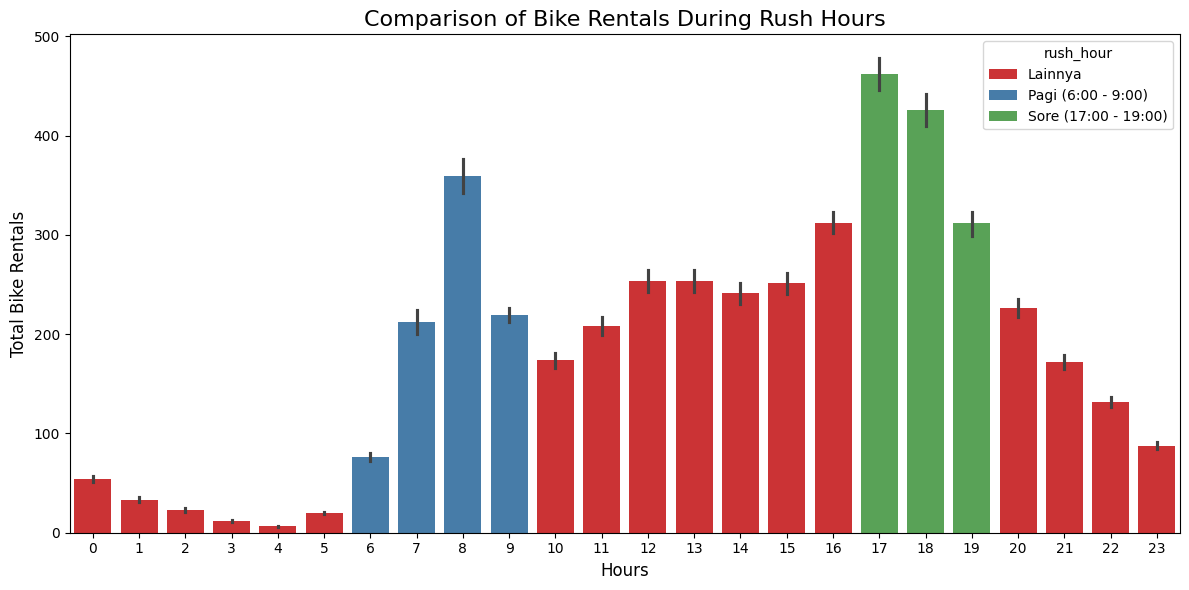

In [62]:
import warnings

# Disable warnings
warnings.filterwarnings("ignore")

# Determine rush hours in the morning and afternoon
hour_df['rush_hour'] = hour_df['hour'].apply(lambda x: 'Pagi (6:00 - 9:00)' if 6 <= x <= 9 else ('Sore (17:00 - 19:00)' if 17 <= x <= 19 else 'Lainnya'))

plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='total_user', hue='rush_hour', data=hour_df, palette='Set1')

plt.title('Comparison of Bike Rentals During Rush Hours', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Total Bike Rentals', fontsize=12)
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

### Pertanyaan 2: Musim mana yang memiliki jumlah tertinggi sepeda yang disewa?

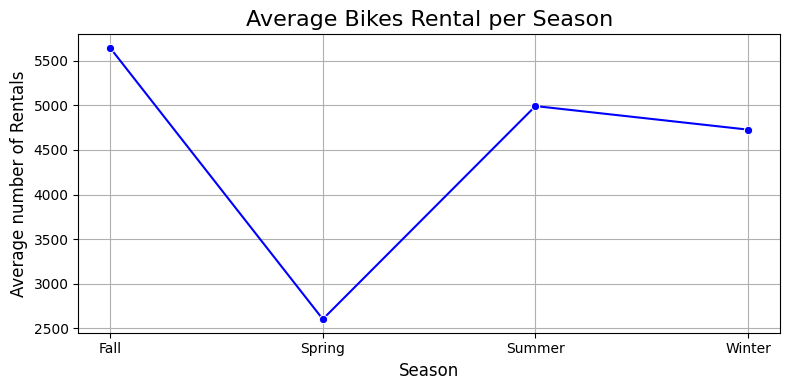

In [ ]:
# Calculates average users per season
season_avg = day_df.groupby('season', observed=False)['total_user'].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x=season_avg.index, y=season_avg.values, marker='o', color='b')  # Line chart dengan marker titik

plt.xlabel("Season", fontsize=12)
plt.ylabel("Average number of Rentals", fontsize=12)
plt.title("Average Bikes Rental per Season", fontsize=16)
plt.grid(True)

plt.tight_layout()
plt.show()

### Pertanyaan 3: Seberapa besar perbandingan jumlah sepeda yang disewa pada saat hari kerja dengan hari libur?

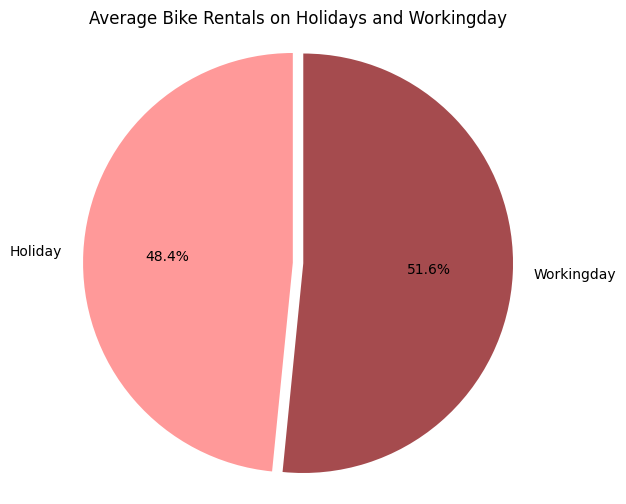

In [ ]:
# Calculate the average number of bicycle users on weekdays and holidays
avg_users = hour_df.groupby("workingday", observed=False).agg({"total_user": "mean"})
labels = ['Holiday', 'Workingday']

# Accessing values based on the index of the avg_users DataFrame
sizes = [avg_users.loc[avg_users.index[0], 'total_user'], avg_users.loc[avg_users.index[1], 'total_user']]

colors = ['#ff9999','#a54b4e']
explode = (0.05, 0)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Average Bike Rentals on Holidays and Workingday')
plt.axis('equal')
plt.show()

**Insight:**
- Dengan adanya grafik, memberikan pemahaman lebih terkait dengan hasil dari pertanyaan.
- Bar chart menunjukkan banyaknya sepeda yang disewa dimana fokus chart terletak pada jam sibuk pagi dan sore.
- Line chart menunjukkan sepeda pada musim gugur tersewa paling banyak, tetapi hal ini berlaku sebaliknya di saat musim semi.
- Pie chart menunjukkan bahwa rata-rata persewaan sepeda pada hari kerja tidak jauh berbeda dengan hari libur.

## Conclusion

- Dari analisis, terlihat jelas bahwa penyewaan sepeda memang benar mengalami peningkatan yang signifikan pada jam-jam sibuk pagi (6:00-9:00) dan sore (17:00-19:00) terutama di jam 8 pagi, 5 sore, dan 6 malam. Hal ini ditandai dengan lonjakan jumlah penyewaan yang jauh lebih tinggi dibandingkan dengan jam-jam lainnya. Kemungkinan besar masyarakat memilih sepeda sebagai moda transportasi utama untuk melakukan aktivitas sehari-hari, seperti berangkat kerja, sekolah, atau berbelanja pada jam tersebut.

- Analisis menunjukkan bahwa musim gugur merupakan waktu di mana jumlah peminjaman sepeda tertinggi terjadi. Musim panas berada di urutan kedua, diikuti oleh musim dingin yang menunjukkan angka peminjaman yang lebih rendah. Musim semi mencatat jumlah peminjaman terendah dari semua musim, menunjukkan bahwa pengguna cenderung lebih suka bersepeda di musim yang lebih hangat dan cerah.

- Dari analisis, terlihat bahwa 51.6% penyewaan sepeda terjadi pada hari kerja, sedangkan 48.4% terjadi pada hari libur. Dimana perbedaan tersebut terlihat tidak terlalu signifikan. Meskipun demikian, penyewaan sepeda sedikit lebih tinggi pada hari kerja. Hal ini menunjukkan bahwa sepeda digunakan baik pada hari kerja maupun hari libur, dengan kecenderungan penggunaan yang lebih besar pada hari kerja, kemungkinan besar karena sepeda digunakan sebagai alat transportasi sehari-hari oleh pekerja.

In [ ]:
from google.colab import files

all_df = pd.concat([day_df, hour_df])
all_df.to_csv("all_data.csv", index=False)
files.download('all_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>